In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1062
smoking_status          0
stroke                  0
dtype: int64

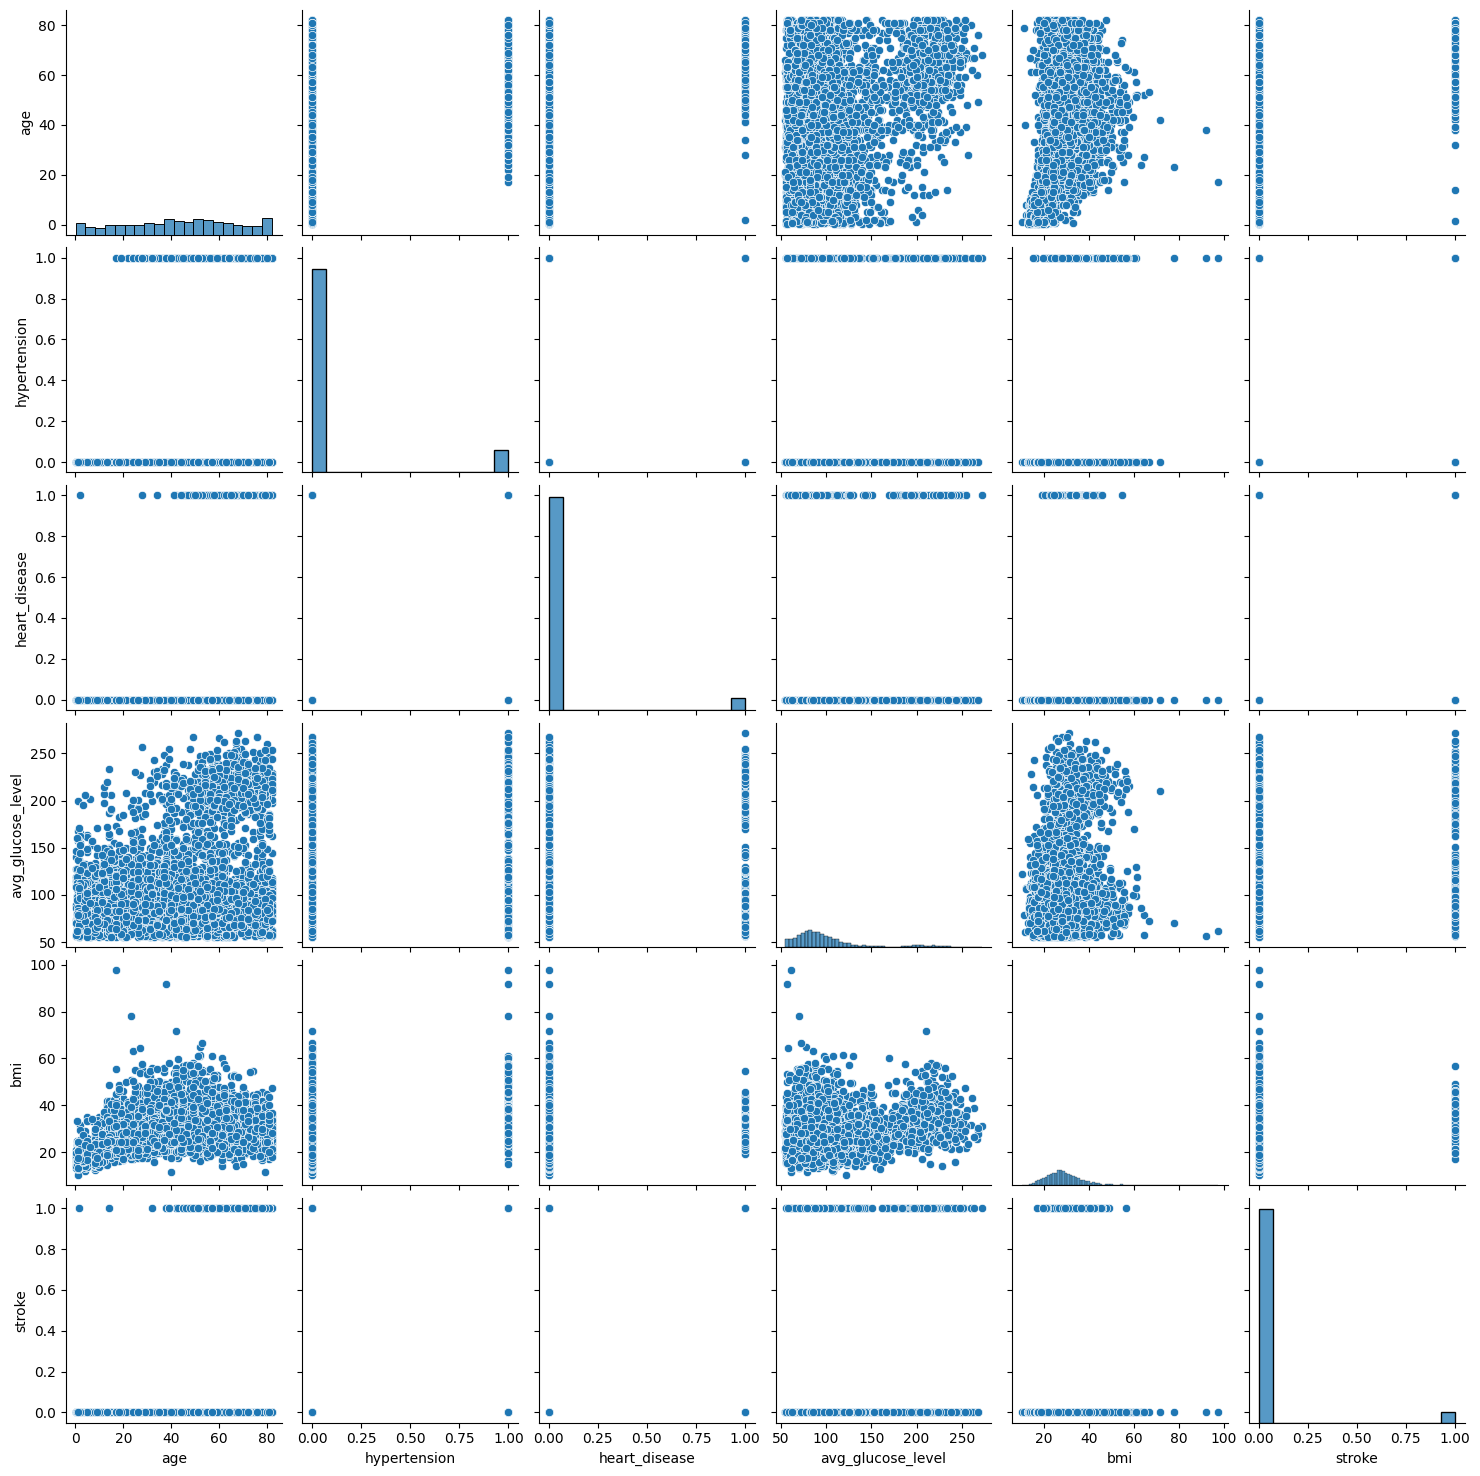

In [4]:
sns.pairplot(df)

<Axes: xlabel='hypertension', ylabel='count'>

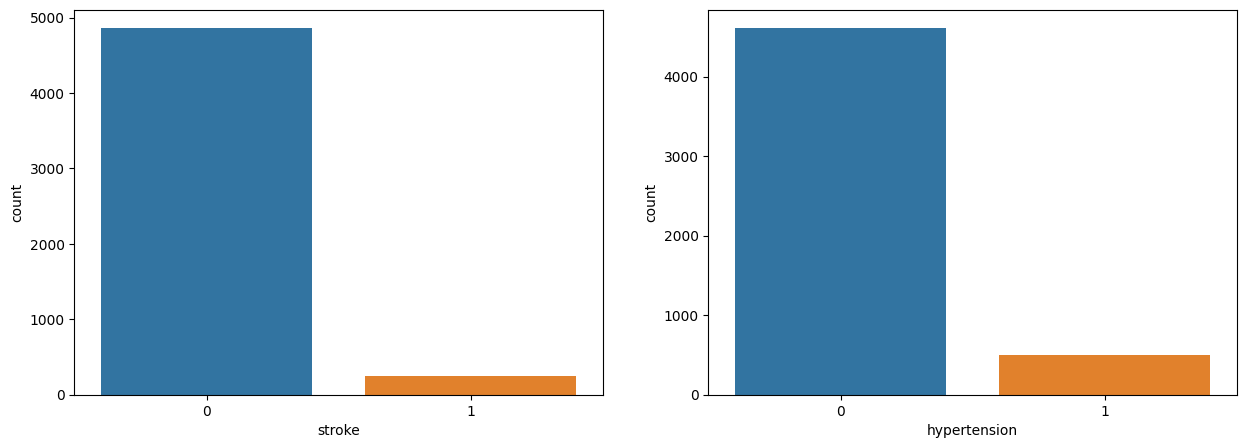

In [13]:
# plot distribution stroke and hypertension
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='stroke', data=df, ax=ax[0])
sns.countplot(x='hypertension', data=df, ax=ax[1])


<h3> Handling imbalanced data

In [31]:
minor=df[df["stroke"]==1]
major=df[df["stroke"]==0]

In [32]:
minor_new=resample(minor,replace=True,n_samples=len(major),random_state=42)

df=pd.concat([minor_new,major])

df=df.sample(frac=1)

In [34]:
minor=df[df["hypertension"]==1]
major=df[df["hypertension"]==0]

In [35]:
minor_new=resample(minor,replace=True,n_samples=len(major),random_state=42)

df=pd.concat([minor_new,major])

df=df.sample(frac=1)

In [36]:
df.hypertension.value_counts()

hypertension
0    6424
1    6424
Name: count, dtype: int64

<h3>Split into independent and dependent features

In [76]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
34,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5088,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown
1183,Male,73.0,1,0,Yes,Self-employed,Rural,102.06,NaN,Unknown


<h3> Automated Preprocessing

In [84]:
cat_feat = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
num_feat = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease"]

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_feat),
    ('num', num_pipe, num_feat)
])

In [85]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.134244
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.621919
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.549349
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.100499
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.216693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12843,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.580002
12844,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.101468
12845,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.197212
12846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.016342


In [86]:
X = pd.DataFrame(preprocessor.fit_transform(X))


ValueError: A given column is not a column of the dataframe

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.134244
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.621919
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.549349
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.100499
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.216693


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10278, 17), (2570, 17), (10278,), (2570,))

In [88]:
models=[LogisticRegression,DecisionTreeClassifier,SVC,RandomForestClassifier]

d={}
for i in models:
    model=i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name=str(i).split(".")[-1][:-2]
    d[model_name]=accuracy_score(y_test,y_pred)

In [89]:
d

{'LogisticRegression': 0.654863813229572,
 'DecisionTreeClassifier': 0.9801556420233463,
 'SVC': 0.7124513618677043,
 'RandomForestClassifier': 0.9782101167315175}